# Basics of MLP
- Objective: create vanilla neural networks (i.e., Multilayer perceptrons) for simple classification task with Keras

## MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>
<center>**MLP with one hidden layer**</center>
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" style="width: 500px"/>
<br>
<center>**MLP with two hidden layers**</center>
- Number of input neurons: 3
- Number of hidden neurons: (4, 4)
- Number of output neurons: 1


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

Using Theano backend.


## MLP for classification tasks
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
whole_data = load_breast_cancer()

In [4]:
X_data = whole_data.data
y_data = whole_data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7) 

### Dataset Description
- Breast cancer dataset has total 569 data instances (212 malign, 357 benign instances)
- 30 attributes (features) to predict the binary class (M/B)
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### 1. Creating a model
- Same with regression model at the outset

In [7]:
from keras.models import Sequential

In [8]:
model = Sequential()

### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added
- Doc: https://keras.io/layers/core/

In [9]:
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (30,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a binary classification
model.add(Activation('sigmoid'))

In [10]:
# This is equivalent to the above code block
# model.add(Dense(10, input_shape = (30,), activation = 'sigmoid'))
# model.add(Dense(10, activation = 'sigmoid'))
# model.add(Dense(10, activation = 'sigmoid'))
# model.add(Dense(1, activation = 'sigmoid'))

### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [11]:
from keras import optimizers

In [12]:
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

In [13]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

### Summary of the model

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
__________

### 2. Training
- Training the model with training data provided

In [15]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.3, epochs = 100, verbose = 1)

Train on 278 samples, validate on 120 samples
Epoch 1/100
278/278 [==============================] - 0s - loss: 0.6926 - acc: 0.5612 - val_loss: 0.6890 - val_acc: 0.5833
Epoch 2/100
278/278 [==============================] - 0s - loss: 0.6867 - acc: 0.6151 - val_loss: 0.6875 - val_acc: 0.5833
Epoch 3/100
278/278 [==============================] - 0s - loss: 0.6833 - acc: 0.6151 - val_loss: 0.6854 - val_acc: 0.5833
Epoch 4/100
278/278 [==============================] - 0s - loss: 0.6801 - acc: 0.6151 - val_loss: 0.6824 - val_acc: 0.5833
Epoch 5/100
278/278 [==============================] - 0s - loss: 0.6769 - acc: 0.6151 - val_loss: 0.6804 - val_acc: 0.5833
Epoch 6/100
278/278 [==============================] - 0s - loss: 0.6742 - acc: 0.6151 - val_loss: 0.6776 - val_acc: 0.5833
Epoch 7/100
278/278 [==============================] - 0s - loss: 0.6715 - acc: 0.6151 - val_loss: 0.6754 - val_acc: 0.5833
Epoch 8/100
278/278 [==============================] - 0s - loss: 0.6694 - acc: 0.6151

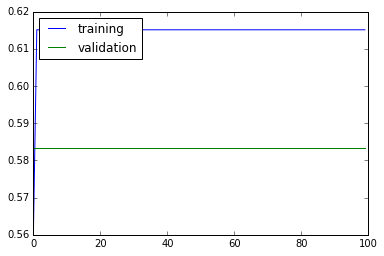

In [16]:
%matplotlib inline  
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'], loc = 'upper left')
plt.show()

### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [17]:
results = model.evaluate(X_test, y_test)

 32/171 [====>.........................] - ETA: 0s

In [18]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'acc']
[0.62530872626611367, 0.67836257240228481]


In [19]:
print('loss: ', results[0])
print('accuracy: ', results[1])

('loss: ', 0.62530872626611367)
('accuracy: ', 0.67836257240228481)
